In [1]:
# Dependencies
import pandas as pd
import requests
import json
import os
import csv
import prettyprint as pp
import matplotlib.pyplot as plt
# from apiclient import errors

# Google developer API key
from api_keys import gkey

In [2]:
world_happiness = "Selected_cities_2020.csv"
location_types = "Location_Types.csv"
world_happiness_df = pd.read_csv(world_happiness, encoding="UTF-8")
location_types_df = pd.read_csv(location_types, encoding="UTF-8")
 # base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

In [3]:
entertainment_location_types = location_types_df.loc[location_types_df["sub_type"]
                                               =="Entertainment",:]
entertainment_types_list = []
entertainment_location_types.reset_index(inplace=True)
for i in range(len(entertainment_location_types)):
    entertainment_types_list.append(entertainment_location_types.loc[i,"location_types"])

entertainment_types_list

['amusement_park',
 'aquarium',
 'art_gallery',
 'movie_theater',
 'night_club',
 'stadium',
 'tourist_attraction',
 'zoo']

In [4]:
base_url = "https://maps.googleapis.com/maps/api/geocode/json"
coord=[]
cities=["Helsinki","Stockholm","Washington D.C.","Brussels",
        "Montevideo","Bucharest", "Islamabad", "Accra","Bhagdad","Kampala","Gaborone"]
for city in cities:
    params = {"address": city, "key":gkey}
    response = requests.get(base_url, params=params)
    places_data = response.json()   
    lat=places_data["results"][0]["geometry"]["location"]["lat"]
    long=places_data["results"][0]["geometry"]["location"]["lng"]
    coord.append(f"{lat},{long}")
coord

['60.16985569999999,24.9383791',
 '59.32932349999999,18.0685808',
 '38.9071923,-77.0368707',
 '50.8503396,4.3517103',
 '-34.9011127,-56.16453139999999',
 '44.4267674,26.1025384',
 '33.6844202,73.04788479999999',
 '5.6037168,-0.1869644',
 '33.315241,44.3660671',
 '0.3475964,32.5825197',
 '-24.6282079,25.9231471']

In [5]:
#Use for loop to calculate amusement parks
place_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
target_type ="amusement park"
count_amusmt_pk=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(place_url, params=params).json()
    count_amusmt_pk.append(len(places_data["results"]))
   
count_amusmt_pk

[0, 0, 0, 4, 3, 0, 1, 2, 2, 0, 0]

In [6]:
#Use for loop to calculate aquariums

target_type ="aquarium"
count_aquariums=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(place_url, params=params).json()
    count_aquariums.append(len(places_data["results"]))

count_aquariums


[2, 3, 0, 1, 1, 0, 0, 0, 1, 1, 0]

In [7]:
entertainment_types_list

['amusement_park',
 'aquarium',
 'art_gallery',
 'movie_theater',
 'night_club',
 'stadium',
 'tourist_attraction',
 'zoo']

In [8]:
#Use for loop to calculate art galleries
target_type ="art gallery"
count_art_galleries=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(place_url, params=params).json()
    count_art_galleries.append(len(places_data["results"]))

count_art_galleries


[20, 20, 20, 20, 5, 16, 1, 1, 3, 3, 2]

In [9]:
#Use for loop to calculate movie theaters
target_type ="movie theater"
count_movie_theaters=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(place_url, params=params).json()
    count_movie_theaters.append(len(places_data["results"]))

count_movie_theaters

[12, 10, 2, 12, 4, 4, 0, 1, 1, 1, 0]

In [10]:
#Use for loop to calculate night clubs
target_type ="night club"
count_clubs=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(place_url, params=params).json()
    count_clubs.append(len(places_data["results"]))

count_clubs

[20, 20, 20, 20, 20, 20, 0, 2, 1, 4, 2]

In [11]:
#Use for loop to calculate tourist attractions
target_type ="stadium"
count_stadiums=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(place_url, params=params).json()
    count_stadiums.append(len(places_data["results"]))

    
count_stadiums

[5, 5, 1, 1, 2, 0, 1, 2, 1, 0, 1]

In [12]:
#Use for loop to calculate tourist attractions
target_type ="tourist attraction"
count_tourist_attractions=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(place_url, params=params).json()
    count_tourist_attractions.append(len(places_data["results"]))

    
count_tourist_attractions

[19, 20, 11, 20, 3, 20, 1, 2, 2, 2, 2]

In [13]:
#Use for loop to calculate zoos
target_type ="zoo"
count_zoos=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(place_url, params=params).json()
    count_zoos.append(len(places_data["results"]))

    
count_zoos

[3, 1, 0, 4, 0, 3, 0, 0, 3, 0, 0]

In [14]:
entertainment_dict = {"Cities":cities,"Stadiums":count_stadiums, "Movie Theathers":count_movie_theaters,"Night Clubs":count_clubs,"Art Galleries":count_art_galleries, 
                      "Tourist Attractions": count_tourist_attractions, "Zoos":count_zoos,"Aquariums":count_aquariums, "Amusement Parks":count_amusmt_pk}
             

entertainment_data_df = pd.DataFrame(entertainment_dict)
entertainment_data_df

,Cities,Stadiums,Movie Theathers,Night Clubs,Art Galleries,Tourist Attractions,Zoos,Aquariums,Amusement Parks
0,Helsinki,5,12,20,20,19,3,2,0
1,Stockholm,5,10,20,20,20,1,3,0
2,Washington D.C.,1,2,20,20,11,0,0,0
3,Brussels,1,12,20,20,20,4,1,4
4,Montevideo,2,4,20,5,3,0,1,3
5,Bucharest,0,4,20,16,20,3,0,0
6,Islamabad,1,0,0,1,1,0,0,1
7,Accra,2,1,2,1,2,0,0,2
8,Bhagdad,1,1,1,3,2,3,1,2
9,Kampala,0,1,4,3,2,0,1,0


In [15]:
#sum the totals of each row
sum_rows= entertainment_data_df.sum(axis=1)


In [16]:
#Add to dataframe
entertainment_data_df["Total"]=sum_rows
entertainment_data_df

,Cities,Stadiums,Movie Theathers,Night Clubs,Art Galleries,Tourist Attractions,Zoos,Aquariums,Amusement Parks,Total
0,Helsinki,5,12,20,20,19,3,2,0,81
1,Stockholm,5,10,20,20,20,1,3,0,79
2,Washington D.C.,1,2,20,20,11,0,0,0,54
3,Brussels,1,12,20,20,20,4,1,4,82
4,Montevideo,2,4,20,5,3,0,1,3,38
5,Bucharest,0,4,20,16,20,3,0,0,63
6,Islamabad,1,0,0,1,1,0,0,1,4
7,Accra,2,1,2,1,2,0,0,2,10
8,Bhagdad,1,1,1,3,2,3,1,2,14
9,Kampala,0,1,4,3,2,0,1,0,11


In [17]:
world_happiness_df

,Rank,Country name,Capital,City's Area (miles^2),Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,1,Finland,Helsinki,82.53,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,...,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,7,Sweden,Stockholm,72.59,Western Europe,7.3535,0.036234,7.424519,7.282481,10.758794,...,0.111615,0.250880,1.972317,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066,2.246299
2,18,United States,Washington D.C.,68.34,North America and ANZ,6.9396,0.047316,7.032340,6.846860,10.925769,...,0.149892,0.699715,1.972317,1.373987,1.404787,0.831618,0.534608,0.298143,0.152285,2.344125
3,20,Belgium,Brussels,62.31,Western Europe,6.8635,0.034370,6.930866,6.796134,10.673639,...,-0.078691,0.612298,1.972317,1.295843,1.398678,0.964901,0.499805,0.146966,0.208724,2.348627
4,26,Uruguay,Montevideo,77.22,Latin America and Caribbean,6.4401,0.045419,6.529121,6.351079,9.948193,...,-0.101103,0.635994,1.972317,1.071000,1.425081,0.856929,0.594267,0.132144,0.193425,2.167276
5,47,Romania,Bucharest,88.03,Central and Eastern Europe,6.1237,0.047433,6.216668,6.030732,10.107584,...,-0.197815,0.934300,1.972317,1.120402,1.194438,0.792295,0.534852,0.068182,0.000830,2.412750
6,66,Pakistan,Islamabad,84.94,South Asia,5.6933,0.048216,5.787804,5.598796,8.482727,...,0.044900,0.745705,1.972317,0.616799,0.872980,0.469933,0.405422,0.228705,0.122592,2.976877
7,91,Ghana,Accra,87.14,Sub-Saharan Africa,5.1480,0.058635,5.262924,5.033076,8.350645,...,0.094171,0.847965,1.972317,0.575862,0.966368,0.432162,0.477290,0.261291,0.056570,2.378437
8,110,Iraq,Bhagdad,78.84,Middle East and North Africa,4.7848,0.077792,4.937272,4.632328,9.661096,...,-0.069565,0.822262,1.972317,0.982019,1.011467,0.529351,0.283588,0.153002,0.073165,1.752174
9,126,Uganda,Kampala,72.97,Sub-Saharan Africa,4.4320,0.068495,4.566251,4.297749,7.500390,...,0.099487,0.836738,1.972317,0.312337,1.052327,0.378312,0.401683,0.264807,0.063819,1.958671


Text(0, 0.5, 'Score')

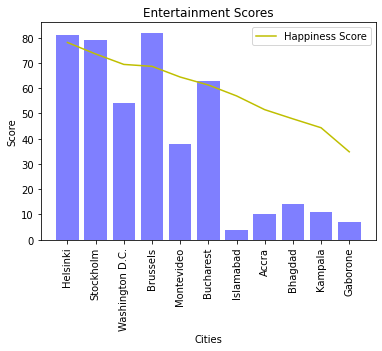

In [18]:
entertainment_score = entertainment_data_df["Total"]
happiness_score = world_happiness_df["Ladder score"]*10
x_cities = entertainment_data_df["Cities"]
plt.bar(x_cities,entertainment_score,color="b",alpha=0.5,align="center")
plt.plot(x_cities,happiness_score,color="y",label="Happiness Score")
plt.xticks(rotation=90)
plt.title("Entertainment Scores")
plt.legend(loc="upper right")
plt.xlabel("Cities")
plt.ylabel("Score")
